In [ ]:
!git clone https://github.com/zebular13/ChickenLanguageDataset.git


Cloning into 'ChickenLanguageDataset'...
remote: Enumerating objects: 199, done.
remote: Total 199 (delta 0), reused 0 (delta 0), pack-reused 199 (from 1)
Receiving objects: 100% (199/199), 77.70 MiB | 10.27 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (159/159), done.


In [ ]:
%cd ChickenLanguageDataset


/content/ChickenLanguageDataset


In [ ]:
!ls


longer_segments  noise	README.md  single_vocalizations


In [ ]:
!pip install librosa soundfile


In [ ]:
import librosa
import os
import numpy as np
import pandas as pd


def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=5.0)

    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    return np.hstack((mfcc, chroma, zcr, spectral_centroid))


base_path = "single_vocalizations"


data = []
labels = []


for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith(".wav"):
                file_path = os.path.join(category_path, file)
                features = extract_features(file_path)
                data.append(features)
                labels.append(category)

df = pd.DataFrame(data)
df['label'] = labels


df.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,label
0,-159.012604,54.065033,-64.517570,-8.007232,5.053638,-7.321293,-10.555817,12.013930,0.721503,6.479701,...,0.340414,0.382759,0.504842,0.552094,0.400566,0.407155,0.442287,0.154168,2578.753073,disturbed_in_nest_box
1,-242.815109,139.198212,-60.578102,22.612658,-12.247022,-12.005631,8.603292,6.382382,-10.827550,-5.637650,...,0.554045,0.547071,0.451007,0.307160,0.244862,0.332762,0.224905,0.120691,1798.538288,disturbed_in_nest_box
2,-128.711334,68.067017,-64.182167,-30.690653,-13.554878,-8.404375,-3.033746,15.004688,-3.442987,8.672130,...,0.561529,0.510103,0.333936,0.324865,0.326396,0.257337,0.248756,0.147942,2439.015655,disturbed_in_nest_box
3,-172.396149,58.367611,-76.190956,-17.339897,4.381439,-1.600737,-11.771738,8.563897,-1.757425,2.048299,...,0.639594,0.574336,0.484217,0.492692,0.384871,0.315454,0.474297,0.136852,2388.432384,disturbed_in_nest_box
4,-267.378784,107.173965,-14.396236,0.634248,-8.868805,2.018397,5.949358,7.306426,-9.851375,-0.922610,...,0.254675,0.235578,0.273986,0.292274,0.248811,0.366181,0.397652,0.109014,2164.051763,hungry


In [ ]:
df.tail()
df['label'].value_counts()


,count
label,
greeting,24
where_is_everyone,15
eating,14
tidbitting_hen,13
hungry,5
disturbed_in_nest_box,4
unknown,4
ouch,3
need_nest_box,1


In [ ]:

counts = df['label'].value_counts()
print(counts)


df_filtered = df[df['label'].isin(counts[counts > 1].index)]


X = df_filtered.drop('label', axis=1)
y = df_filtered['label']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


label
greeting                 24
where_is_everyone        15
eating                   14
tidbitting_hen           13
hungry                    5
disturbed_in_nest_box     4
unknown                   4
ouch                      3
need_nest_box             1
Name: count, dtype: int64
Train shape: (65, 34)
Test shape: (17, 34)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


✅ Accuracy: 0.7058823529411765

📋 Classification Report:

                       precision    recall  f1-score   support

disturbed_in_nest_box       1.00      1.00      1.00         1
               eating       0.33      0.33      0.33         3
             greeting       0.67      0.80      0.73         5
               hungry       0.00      0.00      0.00         1
       tidbitting_hen       0.75      1.00      0.86         3
              unknown       0.00      0.00      0.00         1
    where_is_everyone       1.00      1.00      1.00         3

             accuracy                           0.71        17
            macro avg       0.54      0.59      0.56        17
         weighted avg       0.62      0.71      0.66        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


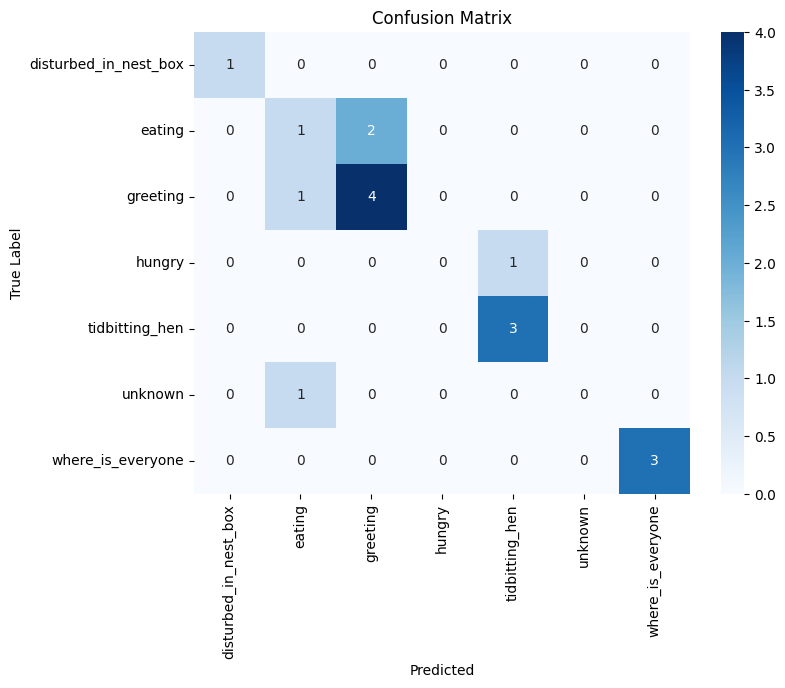

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print("✅ Accuracy:", accuracy_score(y_test, y_pred))


labels_present = np.unique(y_test)
print("\n📋 Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.inverse_transform(labels_present),
            yticklabels=le.inverse_transform(labels_present),
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


✅ SVM Accuracy: 0.35294117647058826

📋 Classification Report (SVM):

                       precision    recall  f1-score   support

disturbed_in_nest_box       0.00      0.00      0.00         1
               eating       0.00      0.00      0.00         3
             greeting       0.36      1.00      0.53         5
               hungry       0.00      0.00      0.00         1
       tidbitting_hen       0.33      0.33      0.33         3
              unknown       0.00      0.00      0.00         1
    where_is_everyone       0.00      0.00      0.00         3

             accuracy                           0.35        17
            macro avg       0.10      0.19      0.12        17
         weighted avg       0.16      0.35      0.21        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


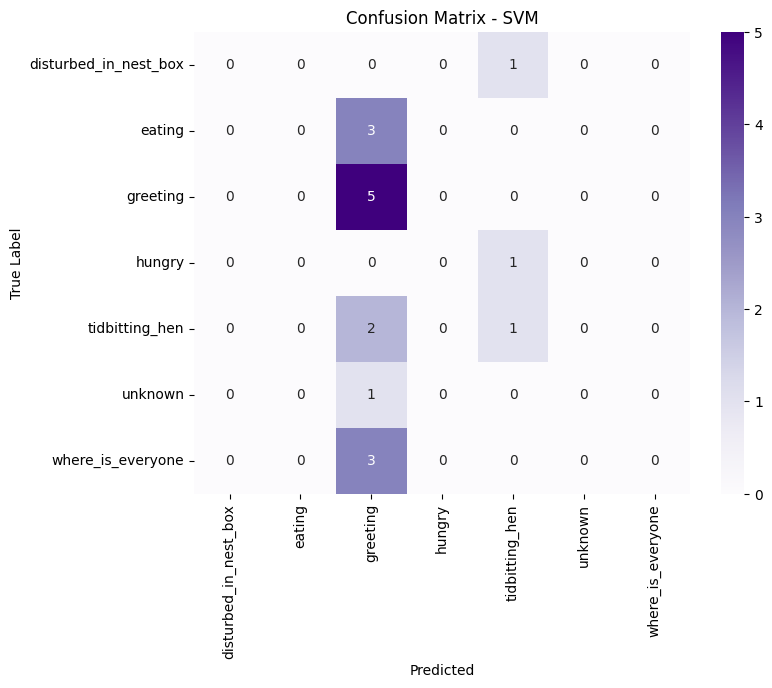

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


labels_present = np.unique(y_test)


print("\n📋 Classification Report (SVM):\n")
print(classification_report(
    y_test,
    y_pred_svm,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))


cm_svm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d',
            xticklabels=le.inverse_transform(labels_present),
            yticklabels=le.inverse_transform(labels_present),
            cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


✅ KNN Accuracy: 0.23529411764705882

📋 Classification Report (KNN):

                       precision    recall  f1-score   support

disturbed_in_nest_box       0.00      0.00      0.00         1
               eating       0.00      0.00      0.00         3
             greeting       0.14      0.20      0.17         5
               hungry       0.00      0.00      0.00         1
       tidbitting_hen       0.33      0.33      0.33         3
              unknown       0.00      0.00      0.00         1
    where_is_everyone       0.50      0.67      0.57         3

             accuracy                           0.24        17
            macro avg       0.14      0.17      0.15        17
         weighted avg       0.19      0.24      0.21        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


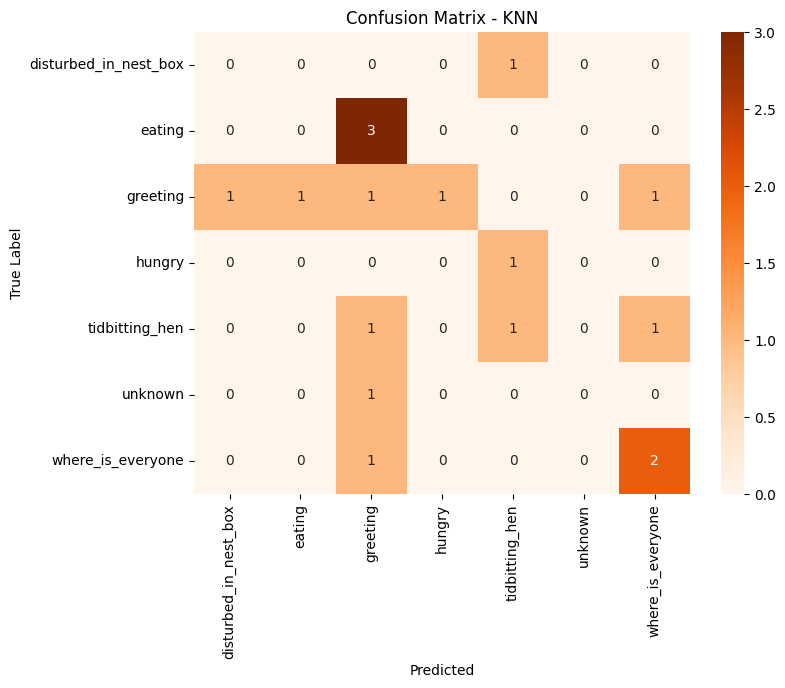

In [ ]:

print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

labels_present = np.unique(y_test)


print("\n📋 Classification Report (KNN):\n")
print(classification_report(
    y_test,
    y_pred_knn,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))


cm_knn = confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d',
            xticklabels=le.inverse_transform(labels_present),
            yticklabels=le.inverse_transform(labels_present),
            cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()
